## Observations and Insights 

In [149]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [150]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)  #249 Rows
print(f"There are {len(mouse_metadata)} rows in the mouse metadata file")
mouse_metadata.head()

There are 249 rows in the mouse metadata file


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [151]:
study_results = pd.read_csv(study_results_path) #1893 Rows
print(f"There are {len(study_results)} rows in the study_results file")
study_results.head()

There are 1893 rows in the study_results file


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [152]:
# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how='left')
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [153]:
# Checking the number of mice.

print(f"There are {len(combined_df)} rows in the combined dataframe")

There are 1893 rows in the combined dataframe


In [154]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_timepoint = combined_df[["Mouse ID","Timepoint"]]
mouse_dups = mouse_timepoint[mouse_timepoint.duplicated()]
mouse_dups

,Mouse ID,Timepoint
137,g989,0
360,g989,5
681,g989,10
869,g989,15
1111,g989,20


In [155]:
# Optional: Get all the data for the duplicate mouse ID. 

g989_data = combined_df[combined_df["Mouse ID"] == "g989"]
print(f"There are {len(g989_data)} duplicated rows")
g989_data

There are 13 duplicated rows


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [156]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_study_results = combined_df[combined_df["Mouse ID"] != "g989"]
clean_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [157]:
# Checking the number of mice in the clean DataFrame.

print(f"There are {len(clean_study_results)} rows in the new, cleaned dataframe")

There are 1880 rows in the new, cleaned dataframe


## Summary Statistics

In [158]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_stats = clean_study_results[["Drug Regimen","Tumor Volume (mm3)"]]
regimen_stats = regimen_stats.rename(columns = {"Tumor Volume (mm3)" : "Tumor Volume"})

regimen_group = regimen_stats.groupby(["Drug Regimen"]).mean()
regimen_group.columns = ["Mean Tumor Volume"]
regimen_group["Median Tumor Volume"] = regimen_stats.groupby(["Drug Regimen"]).median()
regimen_group["Tumor Volume Variance"] = regimen_stats.groupby(["Drug Regimen"]).var()
regimen_group["Tumor Volume Std. Dev."] = regimen_stats.groupby(["Drug Regimen"]).std()
regimen_group["Tumor Volume Std. Err."] = regimen_stats.groupby(["Drug Regimen"]).sem()
regimen_group

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [159]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

regimen_agg_group = regimen_stats.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])
regimen_agg_group

Tumor Volume                                          
                     mean     median        var       std       sem
Drug Regimen                                                       
Capomulin       40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin        52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol       52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril        55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol        54.331565  52.509285  66.173479  8.134708  0.596466
Placebo         54.033581  52.288934  61.168083  7.821003  0.581331
Propriva        52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane        40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn        54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol       53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

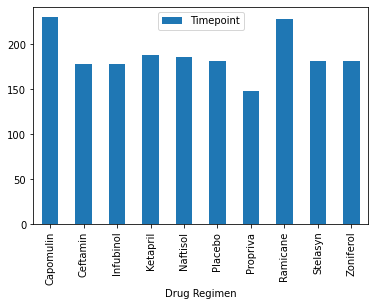

In [160]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


###########################################################################################
##
##  Correct, but need to verify if method is what is being asked on homework (vs pyplot)
##
###########################################################################################

regimen_groups = clean_study_results.groupby("Drug Regimen")
timepoint_groups = regimen_groups["Timepoint"].count()
regimen_tp_df = pd.DataFrame(timepoint_groups)
regimen_tp_df.plot.bar(y="Timepoint")



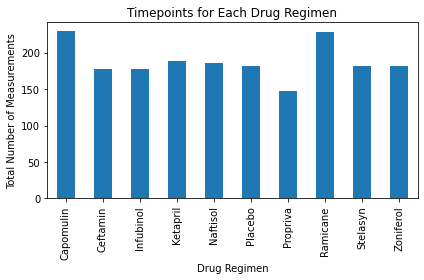

In [161]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

regimen_groups = clean_study_results.groupby("Drug Regimen")
timepoint_groups = regimen_groups["Timepoint"].count()

regemin_chart = timepoint_groups.plot(kind="bar",title="Timepoints for Each Drug Regimen")
regemin_chart.set_xlabel("Drug Regimen")
regemin_chart.set_ylabel("Total Number of Measurements")
plt.tight_layout()
plt.show()

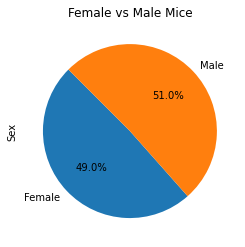

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

###########################################################################################
##
##  Correct, but need to verify if method is what is being asked on homework (vs pyplot)
##
###########################################################################################

sex_df = clean_study_results[["Sex"]]

sex_groups = sex_df.groupby("Sex")
sex_counts = sex_groups["Sex"].count()
sex_names = sex_groups["Sex"].unique()
sex_chart = sex_counts.plot(kind="pie",title="Female vs Male Mice",autopct="%1.1f%%",startangle=135)


Empty DataFrame
Columns: []
Index: [Female, Male]
Sex
Female    922
Male      958
Name: Sex, dtype: int64


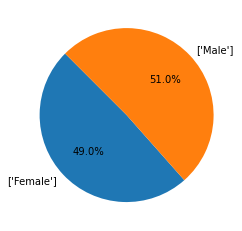

In [163]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


###########################################################################################
##
##  Correct, but need to find out why brackets are being printed on labels
##
###########################################################################################

print(sex_groups.dtypes)
print(sex_counts)

plt.pie(sex_counts, labels=sex_names,autopct="%1.1f%%",startangle=135)
plt.show()


## Quartiles, Outliers and Boxplots

In [164]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_timepoints = clean_study_results[["Drug Regimen", "Mouse ID","Timepoint","Tumor Volume (mm3)"]]
#mouse_timepoints
max_tp_group_all = mouse_timepoints.loc[mouse_timepoints.groupby("Mouse ID")["Timepoint"].idxmax()]
#max_tp_group_all
max_tp_group_all = max_tp_group_all.rename(columns = {"Tumor Volume (mm3)" : "Tumor Volume"})
#max_tp_group_all

max_tp_group = max_tp_group_all.loc[(max_tp_group_all["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"]))]
max_tp_group


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume
1804,Infubinol,a203,45,67.973419
1786,Infubinol,a251,45,65.525743
1856,Ceftamin,a275,45,62.999356
1773,Ramicane,a411,45,38.407618
1836,Ramicane,a444,45,43.047543
...,...,...,...,...
1767,Ceftamin,y769,45,68.594745
1797,Capomulin,y793,45,31.896238
1766,Ceftamin,y865,45,64.729837
1799,Ramicane,z578,45,30.638696


In [166]:
# Put treatments into a list for for loop (and later for plot labels)
drugregimen_l = max_tp_group["Drug Regimen"].tolist()
mouseid_l = max_tp_group["Mouse ID"].tolist()
timepoint_l = max_tp_group["Timepoint"].tolist()
tumorvol_l = max_tp_group["Tumor Volume"].tolist()

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = max_tp_group["Tumor Volume"].quartile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

AttributeError: 'Series' object has no attribute 'quartile'

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
